<a href="https://colab.research.google.com/github/ktripa/CPSC-8430-HW1/blob/main/Q2Minimal_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt


In [26]:

opt = keras.optimizers.Adam(learning_rate=0.01)
loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
train_object = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_object = train_object.shuffle(buffer_size=1024).batch(64)

# Define the Model

In [37]:
images = keras.Input(shape=(784,))
hidden1 = keras.layers.Dense(120, activation="relu")(images)
hidden2 = keras.layers.Dense(230, activation="relu")(hidden1)
classify = keras.layers.Dense(10)(hidden2)
model = keras.Model(inputs=images,outputs=classify)

In [38]:
g_norm = []
loss1 = []
MR=[]
loss2=[]
def func_to_find_MinimalRatio(model, train_dataset, optimizer,epochs):
    for epoch in range(epochs):
      for LayerNum, (x, y) in enumerate(train_dataset):
            with tf.GradientTape() as t:
                with tf.GradientTape() as tt:

                    logits = model(x, training=True) 

                    loss_value = loss_function(y, logits)
                    loss1.append(loss_value)
                dL_dw = tt.gradient(loss_value, model.trainable_weights)
                summed_squares = [K.sum(K.square(grad)) for grad in dL_dw]
                norm = K.sqrt(sum(summed_squares))
                g_norm.append(norm)
            if norm.numpy()<0.2: 
                loss2.append(loss_value)
                d2L_dw2 = t.gradient(dL_dw, model.trainable_weights)
                for w in d2L_dw2:
                    w= w.numpy()
                    print(w.shape)
                Hessian = d2L_dw2[2]
                ll= Hessian[0:100,0:100]
                sq_matrix = tf.convert_to_tensor(ll)
                eigen = tf.linalg.eigh(sq_matrix)
                eigen_values= eigen[0].numpy()
                prop_minima = eigen_values > 0
                min_count = prop_minima.sum()
                min_ratio = min_count/5
                MR.append(min_ratio)

In [40]:
func_to_find_MinimalRatio(model, train_object, opt,10)

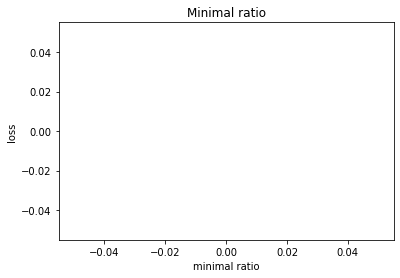

In [42]:
# Plot the minimal ratio
plt.scatter(MR,loss2)
plt.title('Minimal ratio')
plt.ylabel('loss')
plt.xlabel('minimal ratio')
plt.show()

In [10]:
a3=np.arange(-1,3,0.1)

print(a3)

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00]


In [ ]:
r_list = [1,2,3,4]
x=1
for r in r_list:  
    if x%2 ==0: 
        print(r)
x+=1